# Requirements

* [NumPy](https://numpy.org/)
* [SciPy](https://www.scipy.org/install.html)
* [Scikit-learn](https://scikit-learn.org/stable/)
* [Matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import _data_loader
from _data_loader import *
from _data_loader import _X, _convert_lifetime, _x_symlog
import os


# Read and plot multiple datasets
### List all *a? files in directory

In [57]:
# _dir = r'.\Z isomer'  # directory to read

# _dir = r'C:\Users\dominik\Documents\RealTimeSync\Projects\2019-Bilirubin project\TS\Femto\Sadegh\raw data from 2020\470 nm ex'  # directory to read

# _dir = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\2019-Bilirubin project\TS\Femto\2020_01_23 ZE isomer - SVD corr'  # directory to read

# _dir = r'C:\Users\dominik\Documents\RealTimeSync\Projects\2020_07_27_FLA_AF' 
# _dir = '.\\2020_07_27_FLA_AF\\ICA - shit subtracted'

_dir = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\RealTimeSync\Projects\2019-Bilirubin project\TS\Femto\2020_01_23 ZE isomer - ICA corr'
# _dir = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\RealTimeSync\Projects\2019-Bilirubin project\TS\Femto\2020_01_23 ZE isomer'


groups = get_groups(_dir, ext='proc?')
# groups = get_groups(_dir)

groups

[['C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\RealTimeSync\\Projects\\2019-Bilirubin project\\TS\\Femto\\2020_01_23 ZE isomer - ICA corr\\2020_01_23_E1st_MeOH_40ps_filtr_1.proc0',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\RealTimeSync\\Projects\\2019-Bilirubin project\\TS\\Femto\\2020_01_23 ZE isomer - ICA corr\\2020_01_23_E1st_MeOH_40ps_filtr_1.proc1',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\RealTimeSync\\Projects\\2019-Bilirubin project\\TS\\Femto\\2020_01_23 ZE isomer - ICA corr\\2020_01_23_E1st_MeOH_40ps_filtr_1.proc2',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\RealTimeSync\\Projects\\2019-Bilirubin project\\TS\\Femto\\2020_01_23 ZE isomer - ICA corr\\2020_01_23_E1st_MeOH_40ps_filtr_1.proc3',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\RealTimeSync\\Projects\\2019-Bilirubin project\\TS\\Femto\\2020_01_23 ZE isomer - ICA corr\\2020_01_23_E1st_MeOH_40ps_filtr_1.proc4',
  'C:\\Use

### Plot all data

In [58]:
data = load_groups(groups, transpose=True, t_axis_mul=1)
# plot_matrix(data, symlog=True, linthresh=1.5, linscale=2, w_lim=(345, None), z_lim=(-0.3, 0.3))

### Select data

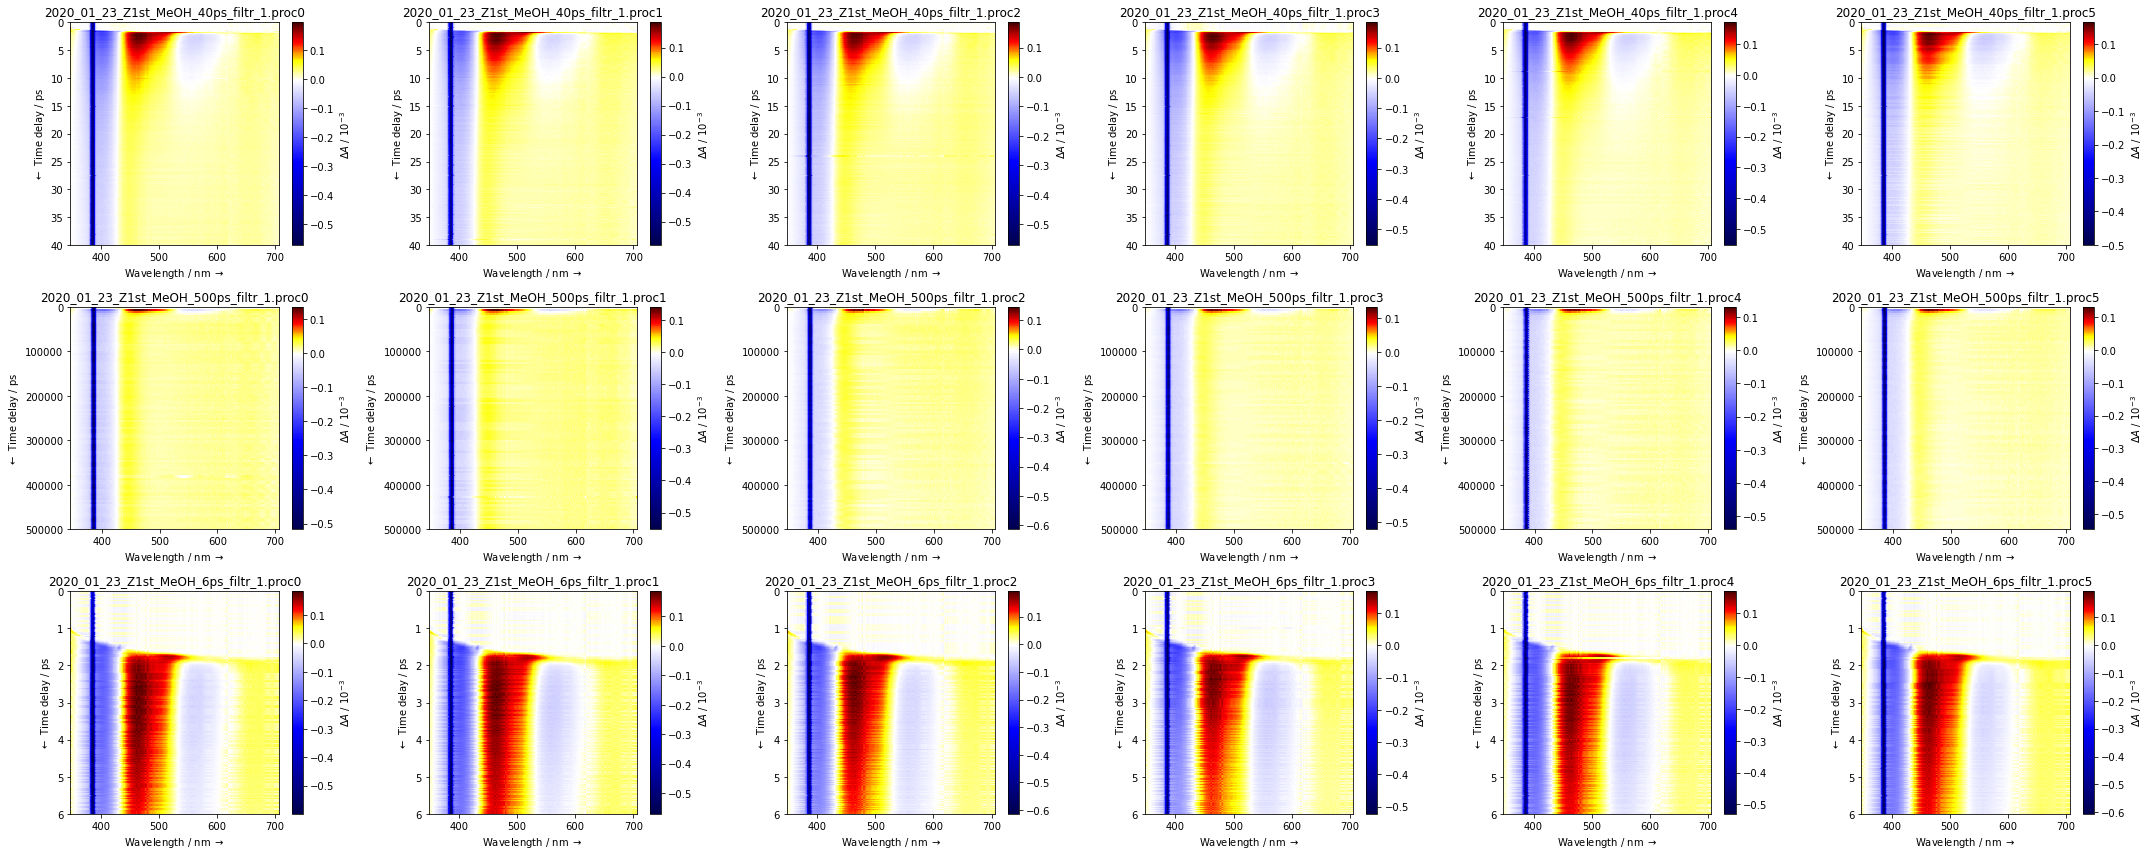

In [59]:
# select only datasets that consists of more than 5 measurements, i.e. file a0 - a5
# g1 = get_groups(_dir)

# for Z
g1 = groups
del g1[:3]
# del g1[2][2]
# del g1[2][-1]

 # E
# g1 = groups
# del g1[3:]


# g1 = g1[18:]
# grps = [[g[0] for g in g1[:6]]] + [[g[0] for g in g1[6:12]]] + [[g[0] for g in g1[12:18]]]
# data = load_groups(grps, transpose=True)

data = load_groups(g1, transpose=True, t_axis_mul=1)


plot_matrix(data)


In [47]:
idx = 6
d = data[-1, idx]

d.crop(w_lim=(348, None))
plot_data(d, D_mul_factor=1e3, symlog=False, z_lim=(None, None), t_lim=(0, None), w_lim=(None, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=3, linscale=5)


path, ext = os.path.splitext(d.fname)
fname = os.path.split(path)[1]
save_path = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\RealTimeSync\Projects\2019-Bilirubin project\TS\Femto\2020_01_23 ZE isomer - ICA corr'
save_path = os.path.join(save_path, fname + f'.proc{idx}')

IndexError: index 6 is out of bounds for axis 1 with size 6

In [644]:
from sklearn.decomposition import FastICA, PCA

print(d.D.shape)

ica = FastICA(n_components=8, max_iter=int(1e4))
C = ica.fit_transform(d.D)  # Reconstruct signals
ST = ica.mixing_.T  # Get estimated mixing matrix

(201, 371)


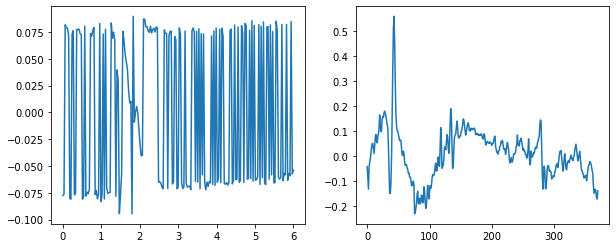

In [645]:
n = 0

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(d.times, C[:, n])
plt.subplot(122)
plt.plot(ST[n])
plt.show()

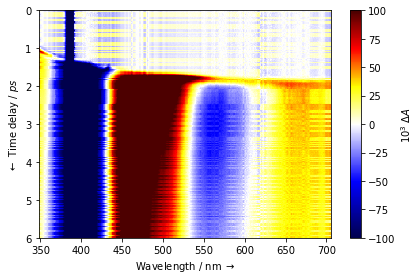

In [46]:
# D_ica = C @ ST
# res = D_ica - d.D
# D_transformed = d.D - np.outer(C[:, n], ST[n, :])
# f = Data.from_matrix(D_transformed, d.times, d.wavelengths)

plot_data(d, D_mul_factor=1e3, symlog=False, z_lim=(-100, 100), t_lim=(0, None), w_lim=(None, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=3, linscale=5)
save_matrix(d, delimiter='\t', fname=save_path)

# plt.plot(f.D[:, -20])
# plt.show()

## Average datasets

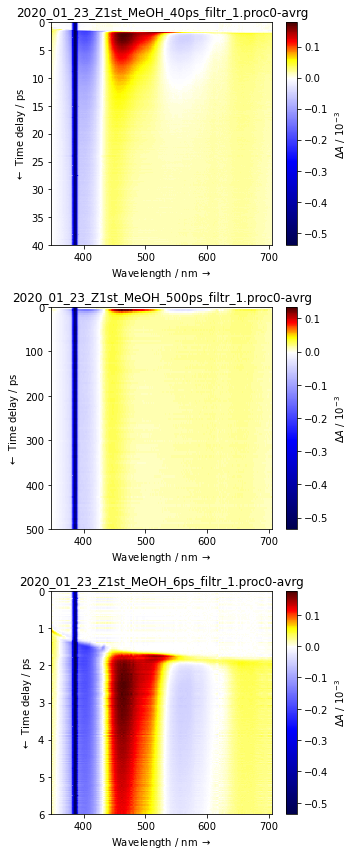

((201, 371), (101, 371), (201, 371))

In [61]:
data_avrg = average(data)

# data_avrg[1, 0].crop(t_lim=(6, None))

# data_avrg[1, 0].D *= 1e-3
data_avrg[1, 0].crop(w_lim=(348, None))
data_avrg[1, 0].times /= 1e3

plot_matrix(data_avrg)
# final_data = data_avrg[0, 0]

data_avrg[0, 0].D.shape, data_avrg[1, 0].D.shape, data_avrg[2, 0].D.shape

In [505]:
data_avrg[1, 0].D

array([[ 8.11153952e-07,  2.66020675e-06,  4.49247849e-06, ...,
         6.31637755e-06,  7.18957197e-06,  4.13850648e-06],
       [ 1.39472022e-05,  9.31318007e-06,  4.58823249e-06, ...,
         1.40637899e-05,  1.34339920e-05,  1.93534175e-05],
       [ 6.28128679e-06,  4.22901948e-06,  1.28781116e-06, ...,
         1.34458549e-05,  1.29046612e-05,  1.52125104e-05],
       ...,
       [-9.00148564e-07, -1.20540585e-06, -1.48279695e-06, ...,
         1.22701072e-05,  1.28326526e-05,  1.20331783e-05],
       [-4.16273084e-07, -8.43510861e-07, -1.25007372e-06, ...,
         1.14893213e-05,  1.14944453e-05,  1.19497801e-05],
       [-1.95926589e-07, -7.75361104e-07, -1.12888056e-06, ...,
         1.09931396e-05,  1.11598761e-05,  1.07942038e-05]])

# Merge datasets and plot

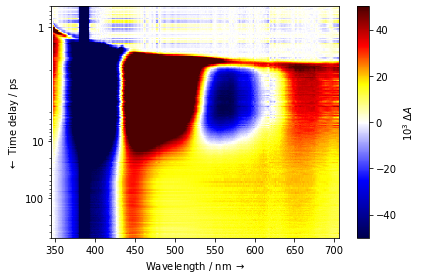

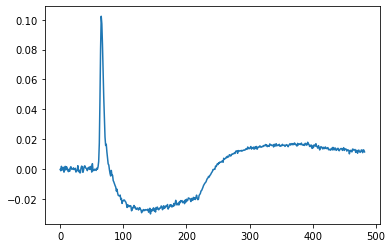

In [62]:
final_data = merge(data_avrg, average_same=True)

plot_data(final_data, D_mul_factor=1e3, symlog=True, z_lim=(-50, 50), t_lim=(0.5, None), w_lim=(345, None), fig_size=(6, 4),
          cmap='diverging', t_unit='ps', title='', filepath=None, dpi=500, linthresh=3, linscale=2)

plt.plot(final_data.D[:, 200])
plt.show()

# Save data to Glotaran

In [65]:
def linlog_numpy(t_start=0, t_end=3100, lin_step=0.02, n_log=100, t_lintresh=2):
    d_lin = t_lintresh - t_start
    n_lin = int(d_lin / lin_step)

    print(f'num of linear points: {n_lin}, num of log points: {n_log}')

    ret = np.zeros(n_lin + n_log)
    ret[:n_lin + 1] = np.linspace(t_start, t_lintresh, n_lin + 1)
    ret[n_lin:] = np.logspace(np.log10(t_lintresh), np.log10(t_end), n_log, endpoint=True)

    return ret

ts = linlog_numpy(0, final_data_bc.times[-1], lin_step=0.03, n_log=200, t_lintresh=3.3)

idxs = find_nearest_idx(final_data_bc.times, ts)

idxs = np.unique(idxs, return_index=True)[0]

final_data_bc.D = final_data_bc.D[idxs, :]
final_data_bc.times = final_data_bc.times[idxs]

# plt.plot(final_data_bc.D[:, 200])
# plt.show()

fname = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\RealTimeSync\Projects\2019-Bilirubin project\TS\Femto\2020_01_23 ZE isomer - ICA corr\2020_01_23_Z1st_MeOH_filtr_1_avrg.txt'

# save_matrix_to_Glotaran(final_data, fname=f'{fname}-GLOTARAN.ascii')
save_matrix(final_data_bc, delimiter='\t', fname=fname, w1=700)
final_data_bc.times

num of linear points: 110, num of log points: 200


array([0.00e+00, 3.00e-02, 6.00e-02, 9.00e-02, 1.20e-01, 1.50e-01,
       1.80e-01, 2.10e-01, 2.40e-01, 2.70e-01, 3.00e-01, 3.30e-01,
       3.60e-01, 3.90e-01, 4.20e-01, 4.50e-01, 4.80e-01, 5.10e-01,
       5.40e-01, 5.70e-01, 6.00e-01, 6.30e-01, 6.60e-01, 6.90e-01,
       7.20e-01, 7.50e-01, 7.80e-01, 8.10e-01, 8.40e-01, 8.70e-01,
       9.00e-01, 9.30e-01, 9.60e-01, 9.90e-01, 1.02e+00, 1.05e+00,
       1.08e+00, 1.11e+00, 1.14e+00, 1.17e+00, 1.20e+00, 1.23e+00,
       1.26e+00, 1.29e+00, 1.32e+00, 1.35e+00, 1.38e+00, 1.41e+00,
       1.44e+00, 1.47e+00, 1.50e+00, 1.53e+00, 1.56e+00, 1.59e+00,
       1.62e+00, 1.65e+00, 1.68e+00, 1.71e+00, 1.74e+00, 1.77e+00,
       1.80e+00, 1.83e+00, 1.86e+00, 1.89e+00, 1.92e+00, 1.95e+00,
       1.98e+00, 2.01e+00, 2.04e+00, 2.07e+00, 2.10e+00, 2.13e+00,
       2.16e+00, 2.19e+00, 2.22e+00, 2.25e+00, 2.28e+00, 2.31e+00,
       2.34e+00, 2.37e+00, 2.40e+00, 2.43e+00, 2.46e+00, 2.49e+00,
       2.52e+00, 2.55e+00, 2.58e+00, 2.61e+00, 2.64e+00, 2.67e

# Baseline correction [optional]

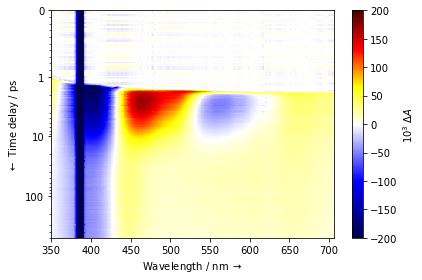

In [63]:
plot_data(final_data, D_mul_factor=1e3, symlog=True, z_lim=(-200, 200), t_lim=(0, None), w_lim=(350, None), fig_size=(6, 4),
          cmap='diverging', title='', filepath=None, dpi=500, linthresh=1, linscale=1)


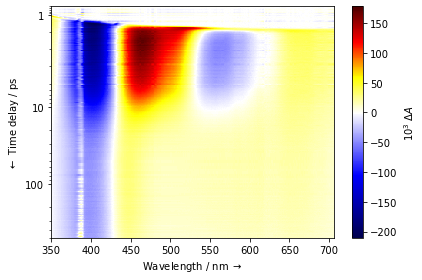

In [64]:
final_data_bc = baseline_corr(final_data, t0=0, t1=0.8)

plot_data(final_data_bc, D_mul_factor=1e3, symlog=True, z_lim=(None, None), t_lim=(0.5, None), w_lim=(350, None), fig_size=(6, 4),
          cmap='diverging', title='', filepath=None, dpi=500, linthresh=5, linscale=1)


# Load matrix from file [optional]

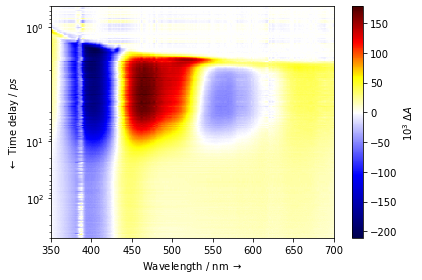

In [31]:
from matplotlib.ticker import *
### ! CHANGE THE FILENAME OF YOUR DATA HERE !
path = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\2019-Bilirubin project\TS\Femto' + '\\'

fname = '2020_01_23_Z1st_MeOH-SVD-corr.txt'
fnam_fit = '2020_01_23_Z1st_MeOH-SVD-corr-D_FIT.txt'


data = Data(path + fname, delimiter='\t', skiprows=0, t_axis_mul=1, transpose=True)
data_fit = Data(path + fnam_fit, delimiter='\t', skiprows=0, t_axis_mul=1, transpose=True)


plot_data(data, D_mul_factor=1e3, symlog=True, z_lim=(None, None), t_lim=(0.5, None), w_lim=(350, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=3, linscale=2, y_major_formatter=ScalarFormatter())

# Chirp Correction

$$\mu(\lambda) = \mu_0 + \sum_{i=1}^{nparmu}\mu_i\left(\frac{\lambda - \lambda_c}{100}\right)^i$$

or exponentials

$$\mu(\lambda) = \mu_0 + \sum_{i=1}^{nparmu}A_i\left(1-e^{\frac{\lambda_c - \lambda}{B_i}}\right)$$

$\mu(\lambda)$ describes the position of IRF, $\lambda_c$ is central wave (usually the excitation wavelength as used in Glotaran), $\mu_0$ is time zero at central wave (parameter *irf1* from Glotaran), $\mu_i$ are then parameters describing the dispersion (parameters *Parmu* from Glotaran)

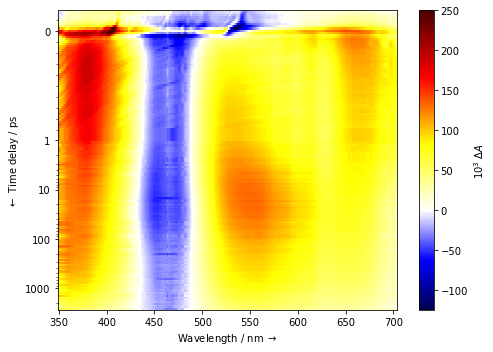

In [14]:
# change the coefficients describing the chirp (from Glotaran fit)

# muZ = (1.2859809, 0.54342, -0.2106254, 0.031334218)
# muE = (0.562611, 0.678523, -0.328499, 0.0581754)
# muHL = (2.61354, 0.241128, -0.0408067)
mu_Flv = (0.738709, 0.382714, -0.214652, 0.0871945, -0.015522)

data_ch = chirp_correct(final_data_bc, 433, mu=mu_Flv, time_offset=0.2)
# data_ch_fit = chirp_correct(data_fit, 388, mu=muZ, time_offset=0.3)

plot_data(data_ch, D_mul_factor=1e3, symlog=True, z_lim=(None, 250), t_lim=(None, None), w_lim=(None, None), fig_size=(7, 5),
          cmap='diverging', title='', filepath=None, dpi=500, linthresh=1, linscale=2, z_unit='$10^3\ \Delta A$')

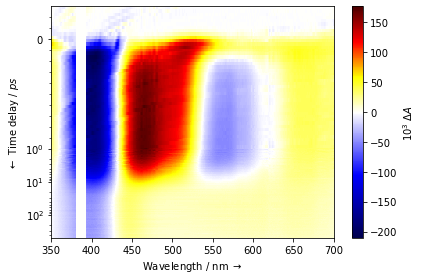

In [5]:
from copy import deepcopy
_data = deepcopy(data_ch)

cut_idxs = find_nearest_idx(_data.wavelengths, [381, 393])
_data.D[:, cut_idxs[0]:cut_idxs[1]] = 0

filepath = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Publications\2020-Half Bilirubin Femto\Figures\Python plotter\Z.png'

plot_data(_data, D_mul_factor=1e3, symlog=True, z_lim=(None, None), t_lim=(None, None), w_lim=(None, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=filepath, dpi=500, linthresh=1, linscale=3, z_unit='$10^3\ \Delta A$')

In [6]:
filepath = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Publications\2020-Half Bilirubin Femto\Figures\Python plotter' + '\\'


save_matrix(data_ch, delimiter='\t', fname=filepath + 'D_chirped_Z.txt')
save_matrix(data_ch_fit, delimiter='\t', fname=filepath + 'D_fit_chirped_Z.txt')


# Lifetime Density Map

Formally, LDM is made by taking an inverse Laplace transform of the data matrix $y(t, \lambda)$
$$W(\tau, \lambda) = \int_0^\infty y(t, \lambda)e^{\frac{t}{\tau}}\mathrm dt$$
In practice, Global Analysis with discrete number of lifetimes ($n\sim100$) using Regularized Regression is performed. In general, Multi-Task Elastic-Net is used which combines $l_1$ (LASSO regression) and $l_2$ (Ridge regression) norms with linear parameter $\rho$.
Amplitudes of LDM are given by
$$\mathbf{W} = \underset{\mathbf{W}}{\mathrm{arg\,min}}\ \left\{\frac{1}{2n_{samples}}\vert\vert \mathbf{XW - Y} \vert\vert_{\mathrm{Fro}}^2 + \alpha\rho\vert\vert \mathbf{W} \vert\vert_{21} + \frac{\alpha(1-\rho)}{2}\vert\vert \mathbf{W} \vert\vert_{\mathrm{Fro}}^2\right\}$$

where $\mathbf X$ is $t\times n$ matrix and consist of folded exponentials (our basis function) and $\mathbf Y$ is $t\times w$, our data matrix. ...Yeah... it does not seem easy, but the minimization is done in [*sci-kit learn* module](https://scikit-learn.org/stable/modules/linear_model.html).

The folded exponentials $c(t)$ are exponentials convoluted with instrument response function $i(t)$ ($*$ denotes [convolution](https://en.wikipedia.org/wiki/Convolution))
Usually, IRF is approximated as gaussian $$i(t) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{t^2}{2\sigma^2}\right) $$ where $\tilde\Delta = \frac{\Delta}{2\sqrt{\ln2}}$ and $\Delta$ is FWHM (full width at half maximum) of the gaussian.

$$c(t) = e^{-kt}\theta(t)*i(t) = \frac12 e^{k\left(\frac{k\sigma^2}{2} - t\right)}\mathrm{erfc}\left(\frac{k\sigma}{\sqrt2} - \frac{t}{\sqrt2\sigma}\right)$$

where $\theta(t)$ is Heaviside step function and $\mathrm{erfc}$ is complementary error function. The columns of $\mathbf X$ are then discrete values of $c(t)$ at different times for range ($n$) of lifetimes (rate constants).

In [19]:
W, data_fit, taus = LDM(data_ch, n_taus=100, p=0, alpha=1, cv=False, irf_fwhm=0.11439965)

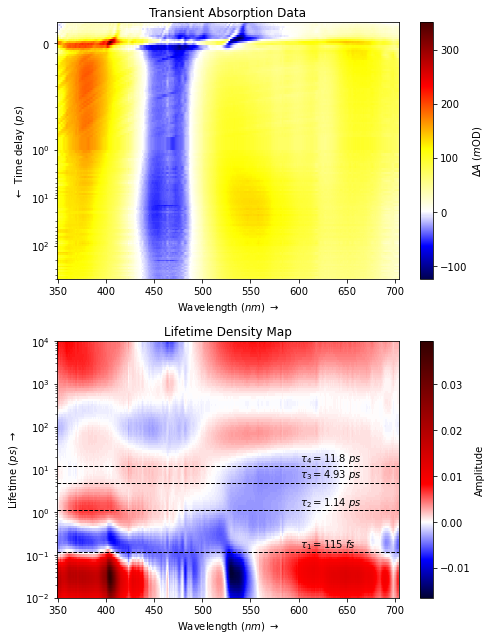

In [20]:
linscale = 2
linthresh = 1

lifetimes = 1 / np.asarray([8.72, 0.87470007, 0.20270008, 0.08481011])
# lifetimes=None

plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(7, 9),
              cmap='diverging', t_unit='$ps$', filepath=None, dpi=300, linthresh=linthresh, linscale=linscale,
            z_lim=(None, None), t_lim=(None, 500), w_lim=(None, None), lifetimes=lifetimes, tidx_animate=None)

# Make the animation [optional]

-- to be properly implemented...

In [305]:

start = data_ch.times[0]
stop = 500
xs, xe = list(find_nearest_idx(data_ch.times, [start, stop]))
n = int((xe - xs) / 5)
linscale = 2
linthresh = 1
lifetimesZ = (0.141, 1.15, 6.098, 5.457e3)
lifetimesE = (1/4.69142, 1/1.30911, 1/0.145683, 1/0.000179102)
lifetimesHL = (1/0.715826, 1/0.190454, 1/0.00282249)


symlog = x_symlog(start, stop, n, linscale=linscale, linthresh=linthresh)
idxs = find_nearest_idx(data_ch.times, symlog)
# print(idxs.shape, idxs[int(idxs.shape[0]/2)])
print(idxs)


# plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(10, 7),
#               cmap='diverging', t_unit='$ps$', filepath=None, dpi=300, linthresh=linthresh, linscale=linscale,
#                   zmin=None, t_lim=(data_ch.times[0], stop), w_lim=(350, None), lifetimes=lifetimesE,
#                  tidx_animate=idxs[:-2], FWHM=0.0484420)

for i in range(1, idxs.shape[0]):
    fname = f"animationE/{i:03d}.png"
    
    plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(10, 7),
              cmap='diverging', t_unit='$ps$', filepath=fname, dpi=300, linthresh=linthresh, linscale=linscale,
                  zmin=None, t_lim=(data_ch.times[0], stop), w_lim=(350, None), lifetimes=lifetimesE,
                 tidx_animate=idxs[:i], FWHM=0.0484420)

[  0   2   3   5   7   8  10  11  13  14  16  18  19  21  22  24  25  27
  29  30  32  34  36  37  39  41  46  55  67  81  99 122 150 170 172 173
 175 178 181 184 189 195 202 211 222 236 253 264 265 266 268 269 271 274
 277]


In [ ]:
# res = Data.from_matrix(data_ch.D - fit.D, data_ch.times, data_ch.wavelengths)

# plot_data(fit, D_mul_factor=1e3,  symlog=True, t0=None, t1=0.5e3, w0=None, w1=None, fig_size=(6, 4),
#           cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=2, zmin=None)

# plot_data(res, D_mul_factor=1e3,  symlog=True, t0=None, t1=0.5e3, w0=None, w1=None, fig_size=(6, 4),
#           cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=2, zmin=None)

In [306]:
# https://stackoverflow.com/questions/46036971/gif-creation-with-imagemagick-convert-images-are-overlapping
delay = 20
dir = "animationE"
command = f"\"C:\\Program Files\\ImageMagick-7.0.2-Q16\\magick.exe\" convert -dispose previous -loop 0 -delay {delay} {dir}\\*.png {dir}\\out.gif"
os.popen(command)

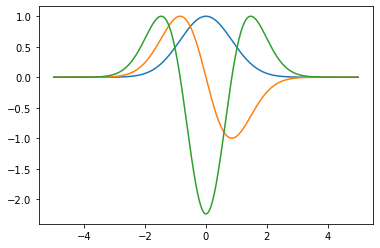

In [51]:
x = np.linspace(-5, 5, 1000)

FWHM = 2
sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))

y1 = np.exp(-0.5 * (x/sigma) ** 2)
y2 = -x * y1
y3 = (x**2/sigma**4 - 1/sigma**2) * y1
y2 /= y2.max()
y3 /= y3.max()

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()



In [46]:
A = np.random.rand(5, 4, 2)
B = np.random.rand(5, 4, 3)


np.concatenate((A, B), axis=-1)


array([[[0.64549892, 0.20305226, 0.39274429, 0.32092452, 0.96824747],
        [0.8638656 , 0.54054727, 0.67719845, 0.25127774, 0.75144983],
        [0.96665477, 0.3657756 , 0.06591023, 0.96301462, 0.32127166],
        [0.30202675, 0.67494621, 0.15986826, 0.7100309 , 0.65500186]],

       [[0.05166394, 0.04705117, 0.33226854, 0.52635064, 0.81502156],
        [0.927802  , 0.87890502, 0.13182166, 0.16323693, 0.82005721],
        [0.5508504 , 0.43052614, 0.22729391, 0.97993857, 0.78046651],
        [0.17682292, 0.18143819, 0.31946047, 0.21124308, 0.68040145]],

       [[0.93719475, 0.24381615, 0.59779823, 0.47566504, 0.83957885],
        [0.26329016, 0.05780375, 0.35854408, 0.25478028, 0.55412853],
        [0.50427485, 0.21564776, 0.063772  , 0.59529438, 0.0740675 ],
        [0.17639608, 0.77584707, 0.13477873, 0.45863413, 0.06360541]],

       [[0.74701047, 0.53404671, 0.77128648, 0.97714243, 0.23117407],
        [0.44589313, 0.89242731, 0.76851199, 0.69821632, 0.41407794],
        [0.391